# 1. Softmax Classification

##### Multinomial Classification

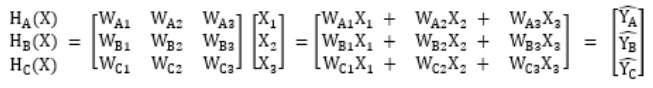

- 우리는 이전 파일에서 Multinomial Classification 의 위와 같은 수식을 도출할 수 있었다
- 위 수식은 (A or notA),(B or notB),(C or notC) 세 가지 경우의 독립된 Y-hat 을 구하는 수식이다
- 그리고 각 경우의 Y-hat 값은 하나의 벡터로 도출된다

- 다만, 우리는 각각 나온 3 가지의 독립된 Y-hat 값에 Sigmoid Function 을 적용해주어야 한다
- 결과로 나온 벡터 값이 Logistic Regression 에서처럼 0 ~ 1 사이의 값이 되어야 하기 때문이다

##### Softmax Classification
- Softmax 는 위 수식에서 도출된 Y-hat(A B C) 에 Sigmoid Function 을 효율적으로 적용하는 방법이다
- Y-hat 각각의 값에 Sigmoid Function 을 적용해줄수도 있지만, 이는 효율적이지 않기 때문이다
- Softmax 는 Y-hat 벡터의 A, B, C 각 값을 0 ~ 1 사이의 값으로 표현하고,
- P(A) + P(B) + P(C) = 1 을 만족하는 확률값으로 바꿔준다

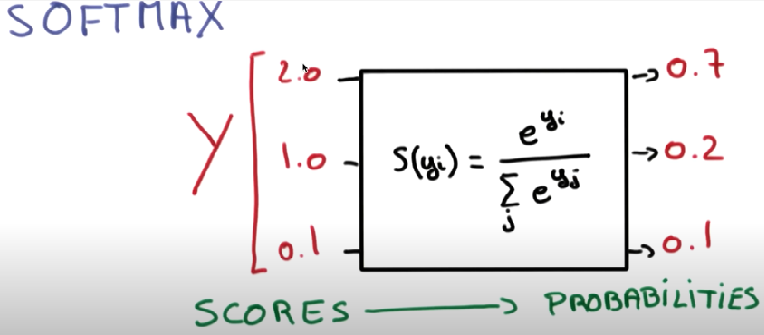

- 위 그림에 나타난 바와 같이 Softmax Function 의 수식은 아래와 같다

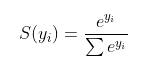

##### 1) Conditions
- 즉, Softmax Function 은 아래와 같이 두 가지의 조건을 만족시킬 수 있다
1.   각각의 Y-hat 값을 0 ~ 1 사이의 값으로 도출
2.   각각의 Y-hat 값을 합했을때, ∑Y-hat = 1 을 만족
- score(값) 을 probablity(확률) 로 변환할 수 있는 것이다

##### 2) One-hot encoding
- 이후, Softmax() 를 통해 얻은 P Vector 를 One-hot encoding 을 사용하여 1 과 0 으로 나타낸다
- 가령, P Vector 중 확률이 가장 큰 P 가 "1" 이 되고, 나머지 P 를 "0" 으로 할당하는 방식
- One-hot encoding 은 표현하고 싶은 값에 1 을 부여하고, 나머지 값에는 0 을 부여하는 벡터 표현 방식

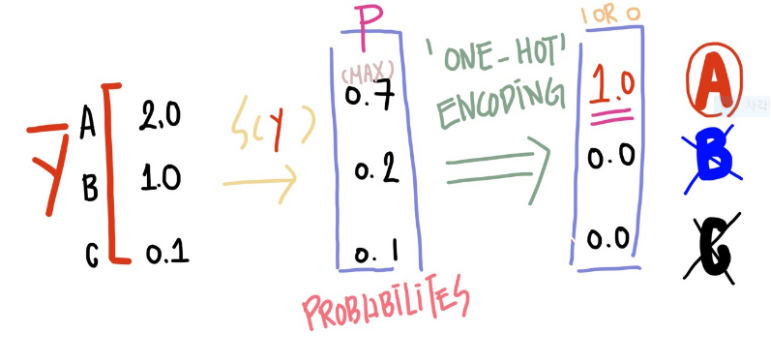

# 2. Cost Function_Cross-entropy

- 우리는 Softmax Function 과 One-hot encoding 을 통해 Hypothesis 를 도출하는 방법을 알아보았다
- 이제 Hypothesis 와 실제 데이터 간 차이를 비교할 Cost Function 을 설계해보도록 하자

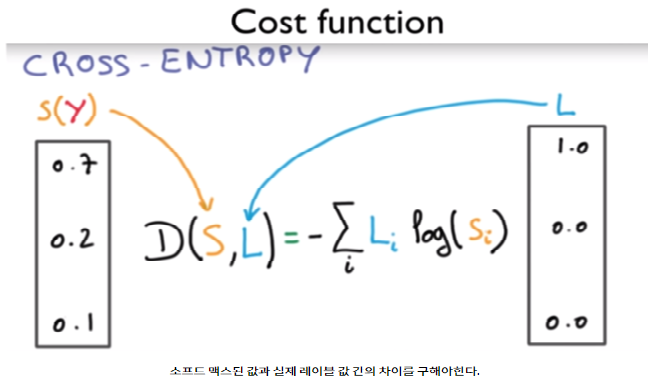

- 위 그림은 Softmax Classification 의 Cost Function 인 Cross-entropy Function 이다

- 아래는 Cross-entropy 의 수식이다

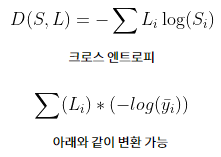

- Li 는 실제 데이터 값, Si 는 Softmax Function 을 통과한 예측값(Y-hat) 이다
- 또한, 이때의 곱은 일반적인 행렬곱이 아니라 아다마르 곱(Hadamard product)이다
- 즉, 같은 shape 의 두 행렬의 각 성분을 곱하는 연산을 사용한다

##### Cross-entropy
- 그렇다면 위의 Cross-entropy 수식은 어떻게 실제 데이터값과 예측값 사이의 차이를 구할 수 있을까
- 아래와 같은 예시를 보자. 이해를 위해 A 와 B, 두 가지 클래스의 간단한 Classification 을 준비했다

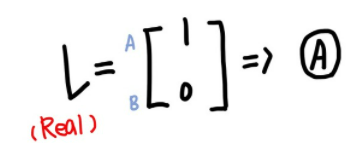

- 실제 데이터 값이 P(A) 가 1, P(B) 가 0 인 Vector 로 나왔다고 가정하자
- 이는 실제 데이터 값이 A 임을 의미하며, 수식의 Li 에 해당 Vector 를 대입할 수 있을 것이다

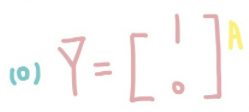
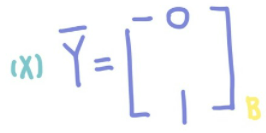

- Softmax Function 과 One-hot encoding 을 거친 우리의 예측값은 다음과 같이 나왔다고 가정하자
- 첫 번째 예측값은 P(A) 가 1 이고, P(B) 가 0 이므로 실제 데이터 값인 'A' 를 올바르게 예측했다
- 두 번째 예측값은 P(A) 가 0 이고, P(B) 가 1 이므로 실제 데이터 값인 'A' 와 다르게 예측했다
- 또한, 이 예측값들은 각각 Cross-entropy 수식에서 Si, 즉 -log 의 인자로 들어갈 수 있을 것이다

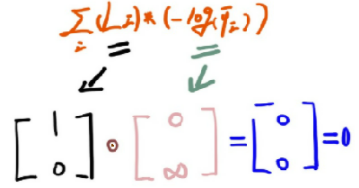
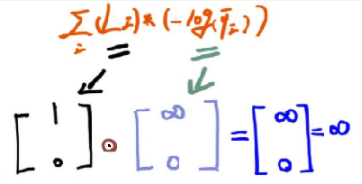

- 이제 Cross-entropy 수식의 Li 에 실제 데이터 값(Vector)을, Y-hat 에 예측값(Vector)을 대입한다
- 올바른 예측값을 넣은 수식의 아다마르 곱은 0 의 결과가,
- 틀린 예측값을 넣은 수식의 아다마르 곱은 무한대의 결과가 나오는 것을 확인할 수 있다

- 이 때, -log(Y-hat) 이 0 또는 무한대가 되는 이유는 간단하다
- Logistic Regression 에서도 살펴보았듯이, -log(H(x)) 의 그래프는 아래와 같기 때문이다

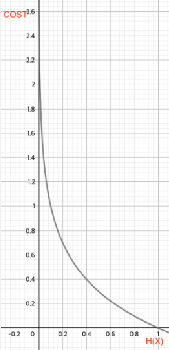

- 즉, 값이 1 과 가까울수록 -log(H(x)) 는 0 에 수렴하고,
- 값이 0 과 가까울수록 -log(H(x)) 는 무한대로 커진다
- 따라서, Y-hat 에 대입한 우리의 예측값 Vector 가 -log 를 통해 0 또는 무한대의 값으로 도출된 것이다

- 올바른 예측값에 대한 Cross-entropy 는 0 이 도출되었고,
- 틀린 예측값에 대한 Cross-entropy 는 무한대가 도출되었다
- 결과적으로 우리는 Cross-entropy 를 통해 0 과 무한대의 값을 도출함으로서 Cost 를 계산할 수 있다

##### Logistic Regression_Cost Function VS Softmax Classification_Cross-entropy

- 이전에 배운 Logistic Cost Function 과 Cross-entropy 를 비교해보자

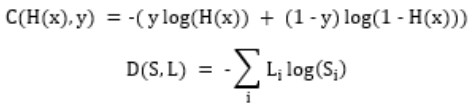

- 위 두 수식은 표현만 다를 뿐 서로 같은 식이다
- Cross-entropy 는 최소한 두 가지 클래스를 분류하게 되고, 이는 (A or B), (1 or 0) 과 같다
- 결국, 실제 데이터 값이 0 인 경우는, Li 값이 0 이기 때문에 수식이 제거되고,
- Li 값이 1 인 경우만 계산을 수행하게 된다
- 이와 마찬가지로, Logistic Cost Function 에서도 y 가 1 일 경우, 뒤의 수식이 제거되고,
- -ylog(H(x)) 앞의 수식만을 계산하게 된다
- 실제로 실제 값(y, L)과 예측값(H(x), S)이 각각 0 과 1 인 네 가지 경우를 계산하면 같은 수식을 얻는다

##### 여러 개의 Training set 에서의 Cost Function

- 지금까지의 Cross-entropy 는 모두 하나의 data set 을 기준으로 살펴보았다
- 그렇다면 여러 개의 Training set 이 존재할 때 Cost Function 은 어떻게 표현될까
- 이는 간단하게 아래의 식으로 구할 수 있다

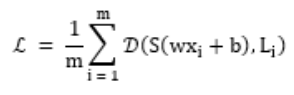

- 다른 Cost Function 들과 마찬가지로, 모든 Training Set 에 대한 예측값과 실제값의 오차를 구한 뒤,
- 각 오차를 모두 더한 값 (∑D(S,L)) 의 mean 으로 도출하는 수식이다

##### Gradient Descent

- 이렇게 구한 Cost(Loss) 에 대해서는 이전과 같은 Gradient Descent Algorithm 을 활용한다